# Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import some python modules
import re

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
print('Qualification:', train['Qualification'].nunique())
print('Experience:', train['Experience'].nunique())
print('Rating:', train['Rating'].nunique())
print('Place:', train['Place'].nunique())
print('Profile', train['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


In [7]:
# Extract Experience Year from Experience column And convert it into Numeric

train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [8]:
train['Place'].fillna('Unknown,Unknown', inplace=True)

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

#Now, we can drop the Place Column
train.drop('Place',axis=1,inplace=True)

In [9]:
# Fill the missing Values in Ratingcolumn with -1% to provide importance to missing value.
train['Rating'].fillna('-1%',inplace=True)

# Now, Extract the actual value of Rating except '%' sign
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)
# Alternate way to do this,
#train['Rating'] = train['Rating'].apply(lambda x: str(x).replace('%','')).astype(int)

In [10]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]   #bins takes 1 fewer value then labels
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [11]:
# Dict of each Qualification with their counts
train['Qualification'] = train['Qualification'].str.split(",") #to take each qual in a list
Qualification = {}

for x in train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:    #if value is there already in dict keys
            Qualification[qual] += 1   #inc its count by 1
        else:
            Qualification[qual] = 1     #else include it in a dict with count of 1

#print(Qualification)

In [12]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    train[qual] = 0
    
for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1
            
#drop the qualification, now it's of no use
train.drop('Qualification', axis=1, inplace=True)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [13]:
# remove the extra Spaces from the city
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))
#encode sector5 with correct city
train['city'] = np.where(train['city'] == "Sector5", "Delhi", train['city'])

# Data Visualization

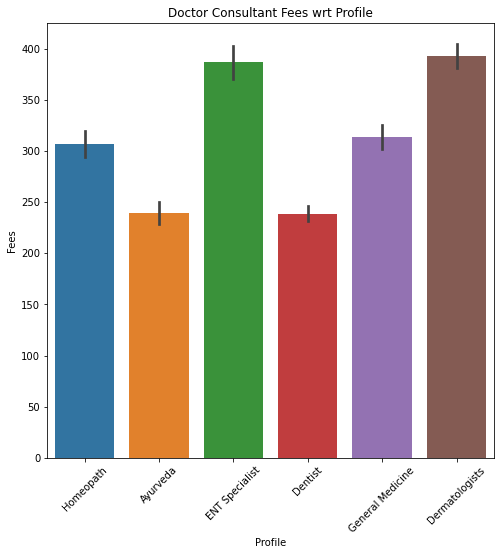

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Consultant Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

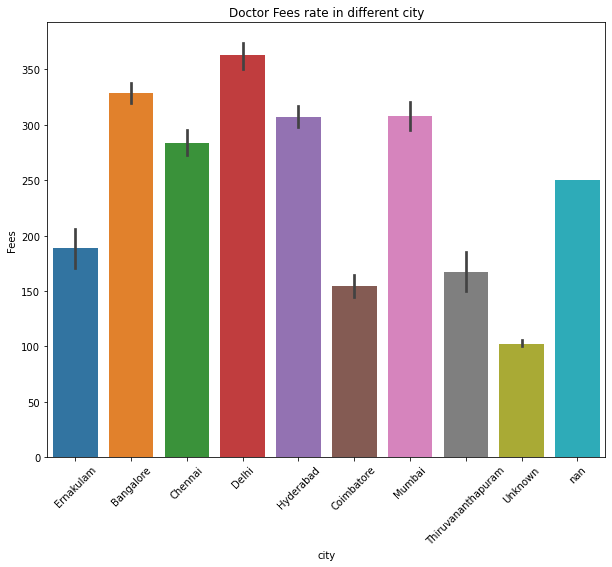

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

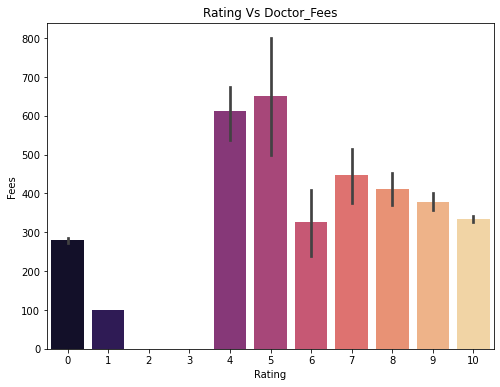

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

# Categorical Encoding

In [17]:
# encode Profile and city
train = pd.get_dummies(train, columns=['city','Profile'], prefix=['city','Profile'])

In [18]:
#change the name of some columns to use it in correct way.
train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)


In [19]:
train.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [22]:
# Extract Experience Year from Experience column And convert it into Numeric

test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

In [24]:
test['Place'].fillna('Unknown,Unknown', inplace=True)

test['locality'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]

#Now, we can drop the Place Column
test.drop('Place',axis=1,inplace=True)

In [25]:
# Fill the missing Values in Ratingcolumn with -1% to provide importance to missing value.
test['Rating'].fillna('-1%',inplace=True)

# Now, Extract the actual value of Rating except '%' sign
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)
# Alternate way to do this,
#train['Rating'] = train['Rating'].apply(lambda x: str(x).replace('%','')).astype(int)

In [26]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]   #bins takes 1 fewer value then labels
labels = [i for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [27]:
# Dict of each Qualification with their counts
test['Qualification'] = test['Qualification'].str.split(",") #to take each qual in a list
Qualification = {}

for x in test['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:    #if value is there already in dict keys
            Qualification[qual] += 1   #inc its count by 1
        else:
            Qualification[qual] = 1     #else include it in a dict with count of 1

#print(Qualification)

In [28]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    test[qual] = 0
    
for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1
            
#drop the qualification, now it's of no use
test.drop('Qualification', axis=1, inplace=True)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [29]:
# remove the extra Spaces from the city
test['city'] = test['city'].apply(lambda x: re.sub(' +','',str(x)))
#encode sector5 with correct city
test['city'] = np.where(test['city'] == "Sector5", "Delhi", test['city'])

# Model Building

Implement the RMSLE function

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

Split dataset into train and test set

In [34]:
x = train.drop('Fees',axis=1)    #Independent Variables
y = train['Fees']                # Dependent Variables(Target)
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Try different models on train and test and check the accuracy


In [35]:
# object of algo we have imported
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
#apply models
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train,y_train)    
    y_pred = reg.predict(x_test)    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.783328807236496
SVR() 0.7753241999570056
DecisionTreeRegressor() 0.6690006227258217
RandomForestRegressor() 0.7648631511052066


Hyperparameter Tuning for Random Forest Algorithm

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# hyperparameter tuning of RandomForest

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5,10]
#max_features
max_features=['auto','sqrt']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }
#fit the data
# increase the n_iter for more accuracy.
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=20, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

# Save the Model

In [38]:
import pickle
file = open("doctorrf_fees.pkl",'wb')

#dump the model to that file
pickle.dump(rf_reg,file)